<a href="https://colab.research.google.com/github/wmmandela/Mandela/blob/main/EmailClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My first Email Classifier

Step 1: Import the libraries

In [ ]:
import pandas as pd

data = pd.read_csv("/content/spam_ham_dataset.csv")
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


Step 2:Load the data

In [ ]:
data.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


Step 3: Explore the data

In [ ]:
data.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [ ]:
data.shape


(5171, 4)

In [ ]:
data.value_counts("label")#Displays class sizes

,count
label,
ham,3672
spam,1499


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
#Check the null alues in a given dataset
data.isnull().sum()

,0
Unnamed: 0,0
label,0
text,0
label_num,0


In [ ]:
#Check the duplicated values
print(f"Duplicated values in the dataset: {data.duplicated().sum()}")

Duplicated values in the dataset: 0


Data Visualization

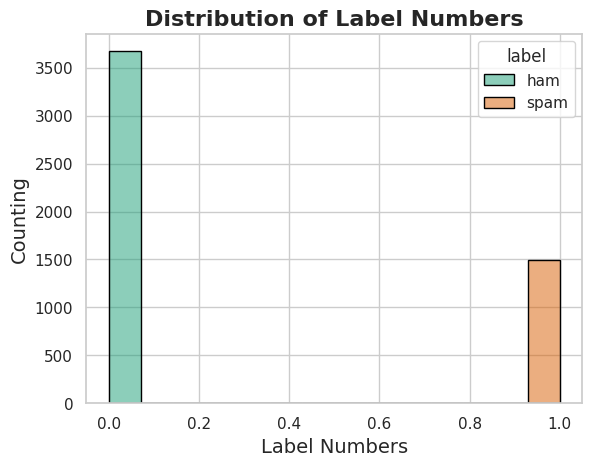

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Set the overall aesthetic of the plots
sns.set(style="whitegrid") #Professional style with grid

#Use the 'Dark2' palette for professional color tones
sns.histplot(data=data, x="label_num", hue="label", palette="Dark2", edgecolor="black", linewidth=1.0)

plt.title("Distribution of Label Numbers", fontsize=16, fontweight='bold')
plt.xlabel("Label Numbers", fontsize=14)
plt.ylabel("Counting", fontsize=14)

plt.show()


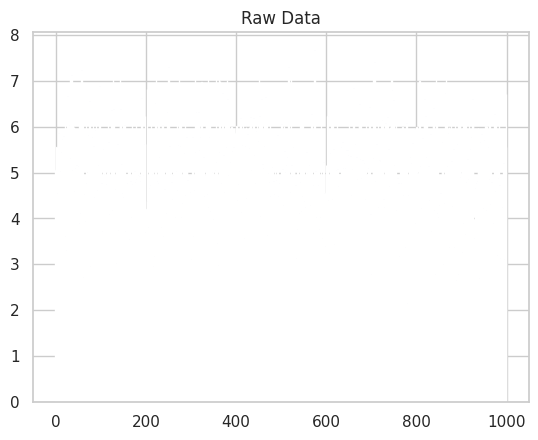

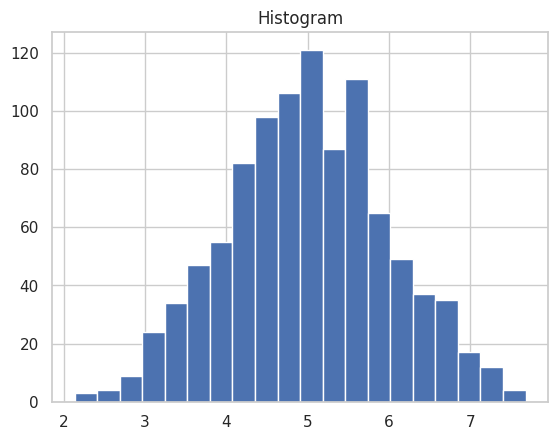

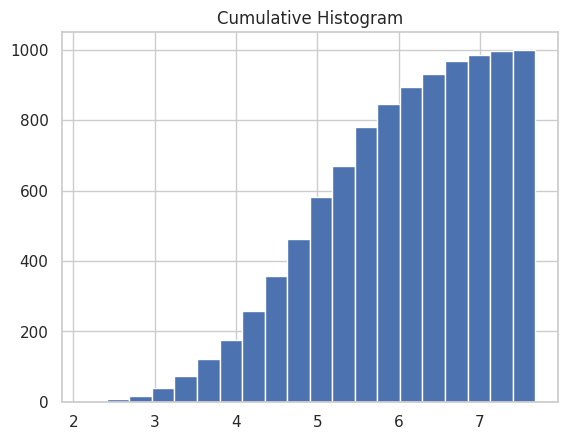

In [ ]:
import numpy as np

# Use numpy to generate a bunch of random data in a bell curve around 5.
n = 5 + np.random.randn(1000)

m = [m for m in range(len(n))]
plt.bar(m, n)
plt.title("Raw Data")
plt.show()

plt.hist(n, bins=20)
plt.title("Histogram")
plt.show()

plt.hist(n, cumulative=True, bins=20)
plt.title("Cumulative Histogram")
plt.show()

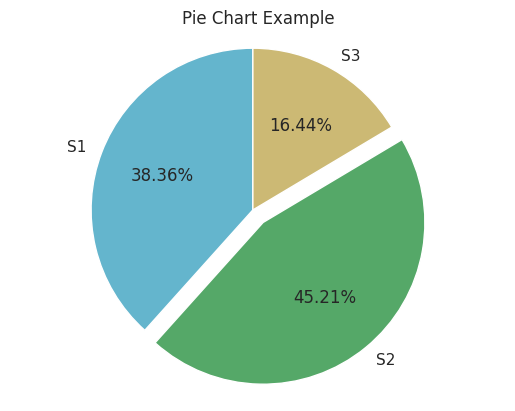

In [ ]:
labels = 'S1', 'S2', 'S3'
sections = [56, 66, 24]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Pie Chart Example')
plt.show()

Modeling

In [ ]:
#Load the machine learning libraries
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

x = tfidf.fit_transform(data['text']).toarray()

In [ ]:
x.shape

(5171, 3000)

In [ ]:
y = data['label'].values

Split the dataset into training and testing datasets

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Train a Naive Bayes Classifier

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

MultinomialNB()

Train a Decision Tree Classifier

In [ ]:
dt_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

MultinomialNB()